# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | el gouna
Processing Record 2 of Set 1 | lucas
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | fort mcmurray
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | kirakira
Processing Record 7 of Set 1 | kusa
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | college
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | puerto armuelles
Processing Record 18 of Set 1 | san matias
Processing Record 19 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,el gouna,27.3942,33.6782,37.05,24,25,1.83,EG,1713974619
1,lucas,41.6501,-83.6666,7.32,76,100,5.66,US,1713974402
2,port-aux-francais,-49.3500,70.2167,4.44,62,77,9.84,TF,1713974620
3,fort mcmurray,56.7268,-111.3810,8.77,46,0,6.17,CA,1713974406
4,waitangi,-43.9535,-176.5597,13.95,85,27,4.16,NZ,1713974620


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el gouna,27.3942,33.6782,37.05,24,25,1.83,EG,1713974619
1,lucas,41.6501,-83.6666,7.32,76,100,5.66,US,1713974402
2,port-aux-francais,-49.3500,70.2167,4.44,62,77,9.84,TF,1713974620
3,fort mcmurray,56.7268,-111.3810,8.77,46,0,6.17,CA,1713974406
4,waitangi,-43.9535,-176.5597,13.95,85,27,4.16,NZ,1713974620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

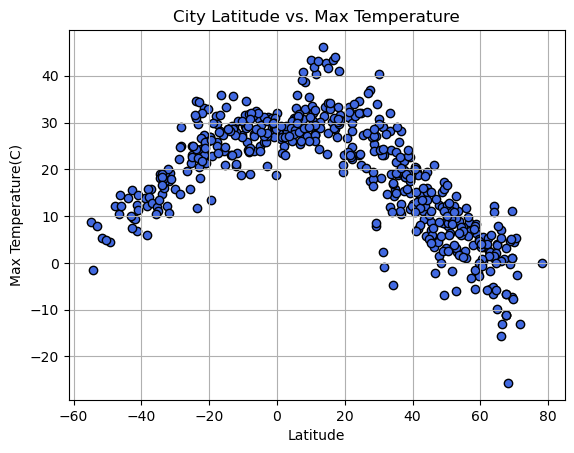

In [15]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, color="royalblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

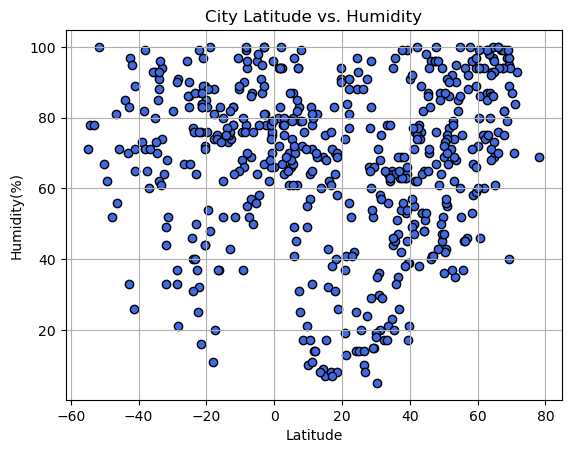

In [30]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(latitude, humidity, color="royalblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

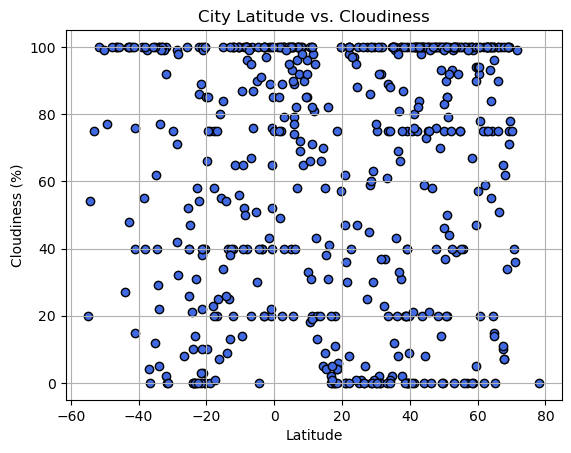

In [17]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, color="royalblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

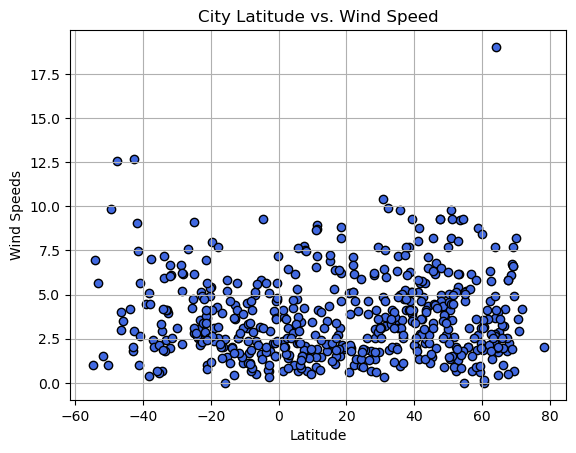

In [18]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, color="royalblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_reg (x_values, y_values, xlabel='', ylabel=''):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(2,3),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"r-value: {rvalue**2}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,el gouna,27.3942,33.6782,37.05,24,25,1.83,EG,1713974619
1,lucas,41.6501,-83.6666,7.32,76,100,5.66,US,1713974402
3,fort mcmurray,56.7268,-111.3810,8.77,46,0,6.17,CA,1713974406
6,kusa,55.3383,59.4406,2.54,75,100,5.20,RU,1713974620
7,constantia,44.1833,28.6500,19.38,65,100,4.35,RO,1713974367


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,4.44,62,77,9.84,TF,1713974620
4,waitangi,-43.9535,-176.5597,13.95,85,27,4.16,NZ,1713974620
5,kirakira,-10.4544,161.9205,27.24,88,100,1.14,SB,1713974620
9,ushuaia,-54.8000,-68.3000,8.81,71,20,1.03,AR,1713974459
11,fale old settlement,-9.3852,-171.2468,29.36,76,14,4.50,TK,1713974621


###  Temperature vs. Latitude Linear Regression Plot

r-value: 0.7507935959154819


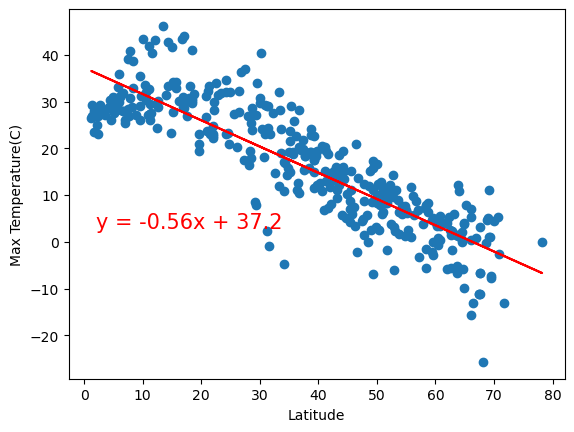

In [35]:
# Linear regression on Northern Hemisphere
nh_lat = northern_hemi_df["Lat"]
nh_temp = northern_hemi_df["Max Temp"]
linear_reg(nh_lat, nh_temp, xlabel="Latitude", ylabel="Max Temperature(C)")


r-value: 0.6387259009863151


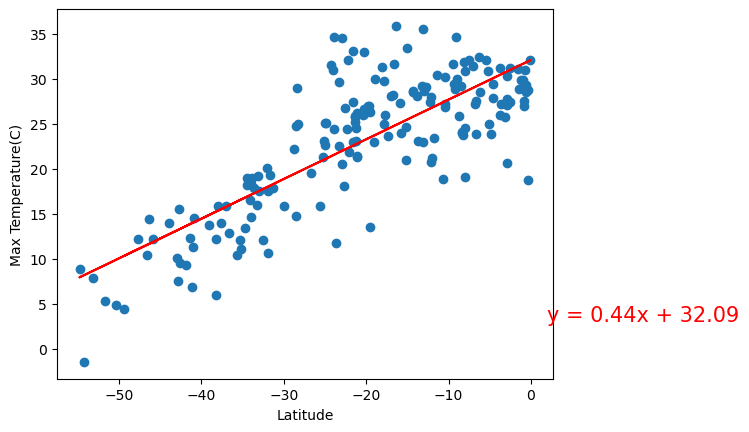

In [36]:
# Linear regression on Southern Hemisphere
sh_lat = southern_hemi_df["Lat"]
sh_temp = southern_hemi_df["Max Temp"]
linear_reg(sh_lat, sh_temp, xlabel="Latitude", ylabel="Max Temperature(C)")

### Humidity vs. Latitude Linear Regression Plot

r-value: 0.08138317547730699


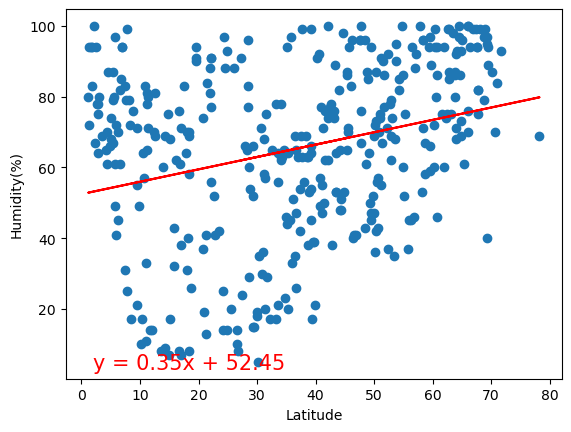

In [37]:
# Northern Hemisphere

nh_humidity = northern_hemi_df["Humidity"]
linear_reg(nh_lat, nh_humidity, xlabel="Latitude", ylabel="Humidity(%)")

r-value: 0.007149946424991178


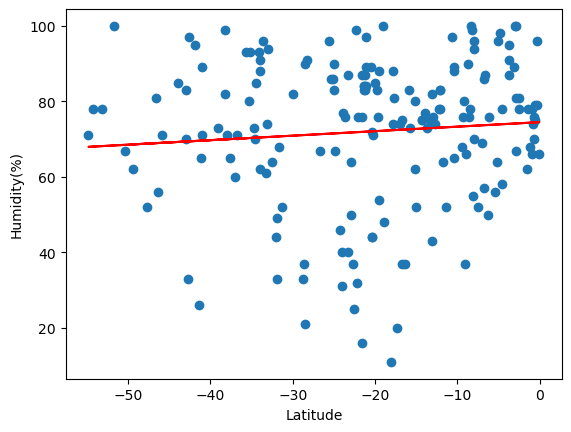

In [39]:
# Southern Hemisphere
sh_lat = southern_hemi_df["Lat"]
sh_humidity = southern_hemi_df["Humidity"]
linear_reg(sh_lat, sh_humidity, xlabel="Latitude", ylabel="Humidity(%)")

**Discussion about the linear relationship:** There is weak correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.005781390676598702


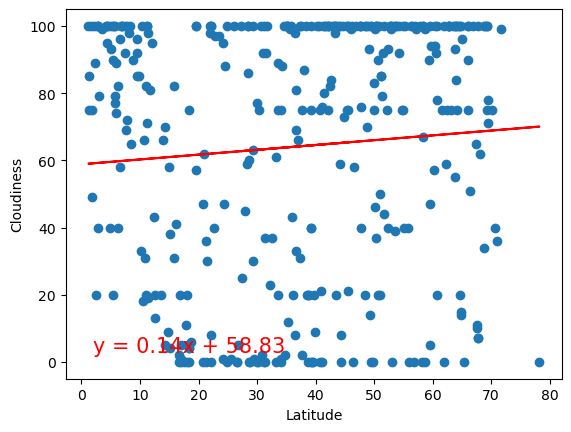

In [26]:
# Northern Hemisphere
nh_cloud = northern_hemi_df["Cloudiness"]
linear_reg(nh_lat, nh_cloud, xlabel="Latitude", ylabel="Cloudiness")

r-value: 4.1992306051868965e-06


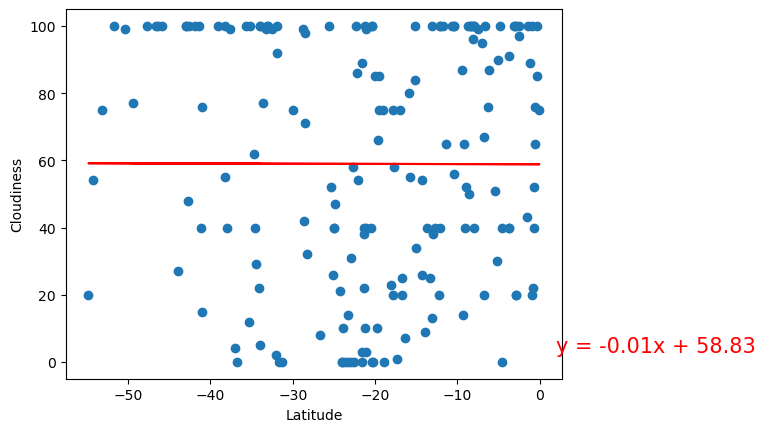

In [27]:
# Southern Hemisphere
sh_cloud = southern_hemi_df["Cloudiness"]
linear_reg(sh_lat, sh_cloud, xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** There is weak correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.009246706770528634


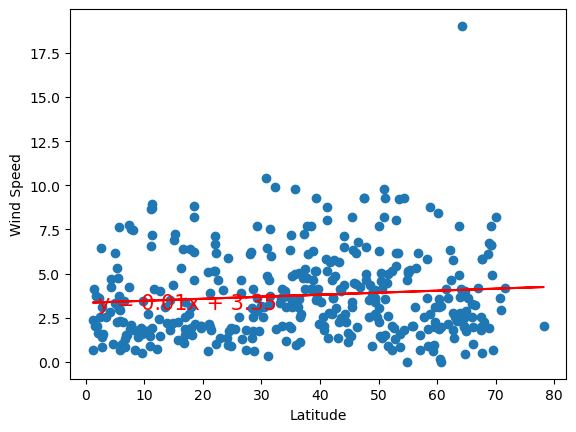

In [28]:
# Northern Hemisphere
nh_wind = northern_hemi_df["Wind Speed"]
linear_reg(nh_lat, nh_wind, xlabel="Latitude", ylabel="Wind Speed")

r-value: 0.05361536709252156


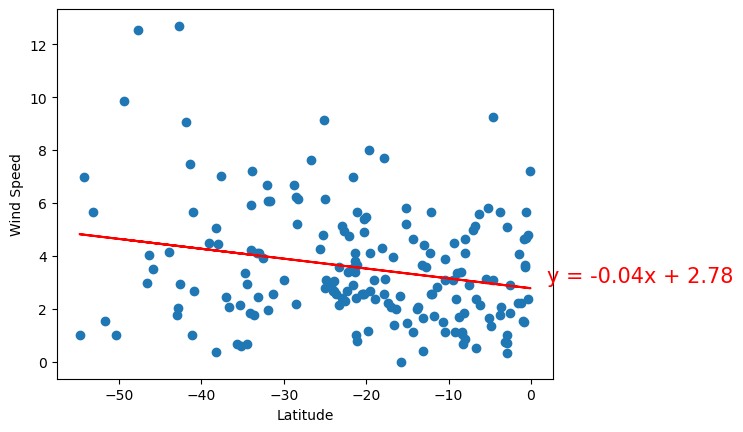

In [29]:
# Southern Hemisphere
sh_wind = southern_hemi_df["Wind Speed"]
linear_reg(sh_lat, sh_wind, xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** The relationship between the two variables are not strong. Norhtern Hemisphere tends to have lower wind speed.